# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#1. The bar Chart shows that out of the 10 different treatments used, Capomulin was the used to tret the highest number of mice
#2. The treatment Ramicane shows that it had the smallest SEM which means that the variability was the least hence, greater precision in
# estimating the mean number of the mice that were treated by the different tratments.
#3. The Box plot shows that results for Capomulin and Ramicane had a final lower tumor voulme than the other two regimes. The results 
# could have been caused by dipospropotionate treatments and or variales.
#4. The Pie Charts show that there was a higher percentage of the Male Mice than the female tha were treated.
#5. The  correlation coefficient and a linear regression model  shows that there was a dirrect correlation in the mice treated with 
# Capolulin. The plot shows a positive results when the average weight and the final tumor volume are compared againgst each other


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = merged_data_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)
clean_data_df.to_csv('data/clean_data.csv', index = False, header = True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_analysis = len(clean_data_df['Mouse ID'].unique())
print(mice_analysis)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Generate a grouped dataframe by Drug Regimen
drug_regimen_gp = clean_data_df.groupby('Drug Regimen')


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


#mean
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()
#Median
median = drug_regimen_gp['Tumor Volume (mm3)'].median()
#Variance
var = drug_regimen_gp['Tumor Volume (mm3)'].var()
#Standard Deviation
std = drug_regimen_gp['Tumor Volume (mm3)'].std()
#SEM Standard Error of Mean
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem()
#Asembled series into a single summary DataFrame
summary_series_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})

In [8]:
print('Series I')
summary_series_df

Series I


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df = drug_regimen_gp['Tumor Volume (mm3)'].agg(['mean','var','median', 'std','sem', 'count'])
summary_statistics_df

,mean,var,median,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346,230
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821,178
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236,178
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860,188
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466,186
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331,181
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332,148
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955,228
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111,181


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

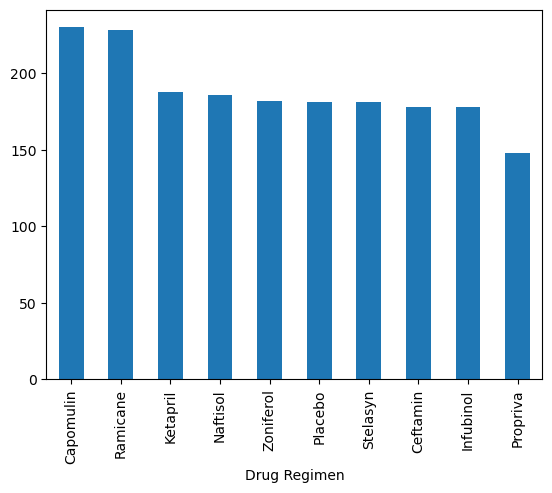

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_count = drug_regimen_gp['Timepoint'].count().sort_values(ascending=False)
timepoint_count.plot.bar(x= 'Drug Regimen', y = '# Of Observed Mouse Timepoints' )

In [11]:
timepoint_count.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object', name='Drug Regimen')

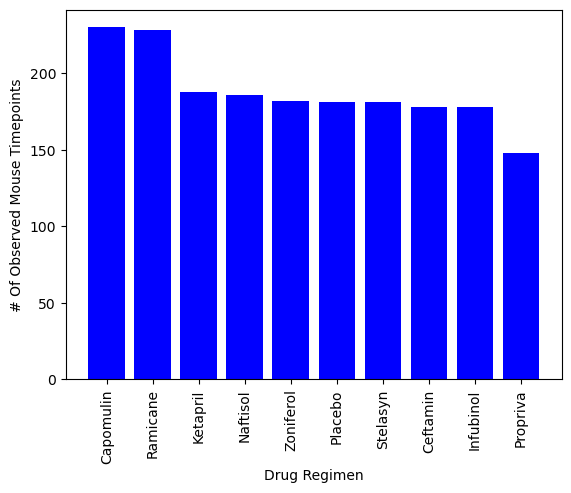

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_count.index,timepoint_count.values, color= 'blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Sex'>

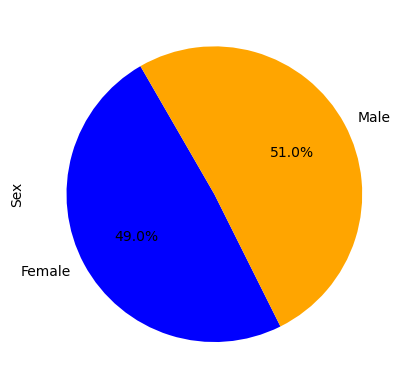

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count= clean_data_df.groupby('Sex')['Sex'].count()
colors= ['blue', 'orange']
gender_count.plot.pie(autopct="%1.1f%%", startangle= 120, colors = colors)

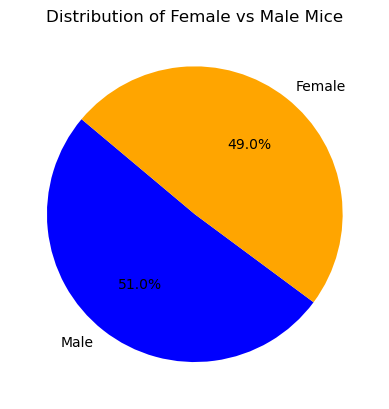

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Count the occurrences of each gender
gender_count = clean_data_df['Sex'].value_counts()
colors = ['blue','orange']
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_id_grouped_df = clean_data_df.groupby('Mouse ID')
last_timepoint = mouse_id_grouped_df['Timepoint'].max()
last_timepoint= last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_volume = pd.merge(last_timepoint,clean_data_df,on=['Mouse ID','Timepoint'],how='left')
last_timepoint_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in regimens:
    temp_df = last_timepoint_volume.loc[last_timepoint_volume['Drug Regimen'] == treatment]

    # Tumor volumes for the current regimen
    tumor_vol_df = temp_df.merge(clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']
    vol_tumors.append(tumor_vol_df)

    # outliers using upper and lower bounds
    drug_quartiles = tumor_vol_df.quantile([.25, .5, .75])
    lowerq = drug_quartiles[0.25]
    upperq = drug_quartiles[0.75]
    iqr = upperq - lowerq

    print(f'The lower quartile of {treatment} is: {round(lowerq, 2)}')
    print(f'The upper quartile of {treatment} is: {round(upperq, 2)}')
    print(f'The interquartile range of {treatment} is: {round(iqr, 2)}')
    print(f'The median of {treatment} is: {round(drug_quartiles[0.5], 2)}')

    bound_lower = lowerq - (1.5 * iqr)
    bound_upper = upperq + (1.5 * iqr)
    print(f"Values below {round(bound_lower, 2)} are possible outliers for {treatment}.")
    print(f"Values above {round(bound_upper, 2)} are possible outliers for {treatment}.")

    outliers = temp_df.loc[(tumor_vol_df <= bound_lower) | (tumor_vol_df >= bound_upper)]
    number_of_outliers = len(outliers)
    print(f"\nThe potential outliers for {treatment} are:")
    print(outliers[['Mouse ID', 'Tumor Volume (mm3)']])
    print('')

KeyError: 'Tumor Volume (mm3)'

Text(0.5, 1.0, 'Final Tumor Volume By Regimen')

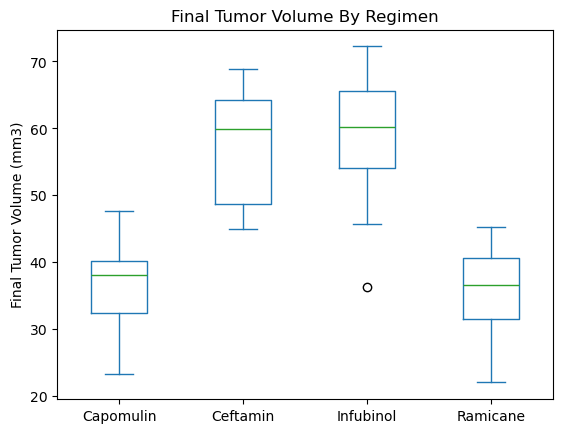

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Creating dataframes for Capomulin, Ramicane, Infubinol, and Ceftamin treatments
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Ceftamin']

# highest value timepoint for each mouse in each treatment
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge group dataframe with the original dataframe 
capomulin_max_df = pd.merge(capomulin_max, clean_data_df, on=['Mouse ID','Timepoint']) 
ramicane_max_df = pd.merge(ramicane_max, clean_data_df, on=['Mouse ID','Timepoint']) 
infubinol_max_df = pd.merge(infubinol_max, clean_data_df, on=['Mouse ID','Timepoint']) 
ceftamin_max_df = pd.merge(ceftamin_max, clean_data_df, on=['Mouse ID','Timepoint'])
# To be used for plot box
regimen_max = pd.concat([capomulin_max_df,ramicane_max_df,infubinol_max_df,ceftamin_max_df],ignore_index=True)
regimen_max
regimen_max.plot.box(column='Tumor Volume (mm3)',by='Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume By Regimen')

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume for Mouse b742 | Treatment: Capomulin')

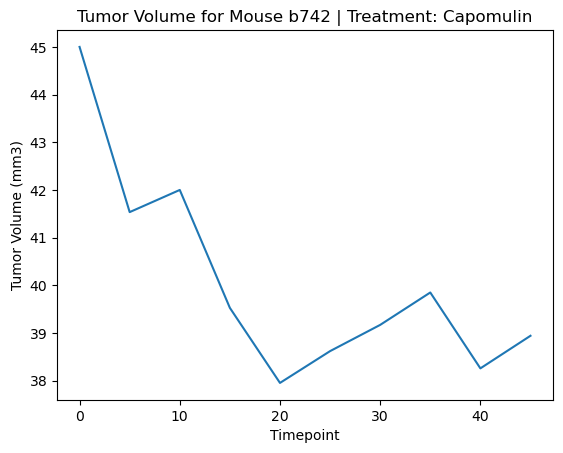

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_b742 = clean_data_df[clean_data_df['Mouse ID'] == 'b742']
plt.plot(mouse_b742['Timepoint'],mouse_b742['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for Mouse b742 | Treatment: Capomulin')

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight | Treatment: Capomulin')

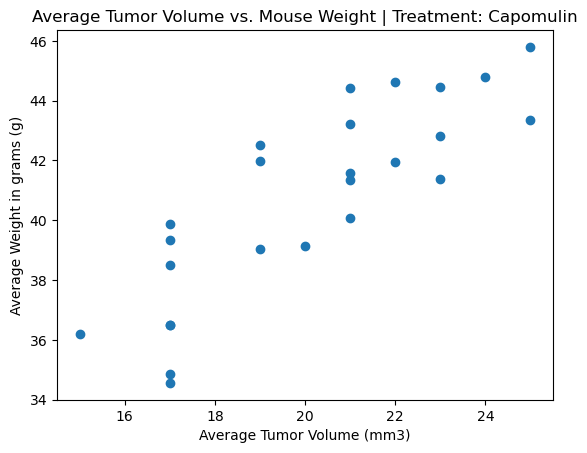

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
average_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(average_weight,average_volume)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight in grams (g)')  
plt.title('Average Tumor Volume vs. Mouse Weight | Treatment: Capomulin')

## Correlation and Regression

The correlation coefficient has a value of 0.84
The linear regression model shows that there is moderate correlation between the average weight and tumor volume of a mouse


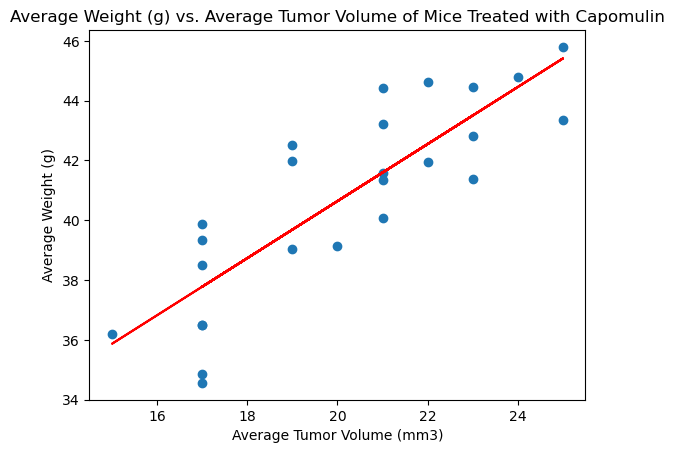

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_avg_tumor, int_avg_tumor, r_avg_tumor, p_avg_tumor, std_avg_tumor = st.linregress(average_weight,average_volume)

#Function for line
line_eq = m_avg_tumor * average_weight + int_avg_tumor

#Plotting linear regression fit
plt.scatter(average_weight, average_volume)
plt.plot(average_weight, line_eq , color = 'red')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight (g)')
plt.title('Average Weight (g) vs. Average Tumor Volume of Mice Treated with Capomulin')

print(f'The correlation coefficient has a value of {r_avg_tumor.round(2)}')
print(f'The linear regression model shows that there is moderate correlation between the average weight and tumor volume of a mouse')